# EDA on Heart Disease Dataset
The dataset that was provided has different independeant variables like age, sex, chest pain type, resting bp, etc and the target variable if the individual has heart disease or not. The EDA helps to find out what factors causes the heart disease or when it is likely that the individual has heart disease


## Group Members:
1. Bimal Kumar Shrestha
2. Aashutosh Shahi
3. Sopnil Nepal
4. Roshan Nepal
5. Hemant Gurung

In [1]:
## Importing all the required libraries

In [61]:
#library for data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#for imputation
from sklearn.impute import KNNImputer

#for calculating the feature relations
from scipy.stats import spearmanr


#for pipeline and transformations
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer

#train test split
from sklearn.model_selection import train_test_split

#for model training and report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [3]:
#Read data into a pandas dataframe for data manipulations
df= pd.read_csv('1_1st dataset heart disease.csv')
df.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
#check the dimension of the dataframe: number of rows and columns in the dataframe
df.shape

(1190, 12)

In [6]:
#provides information on datatype for all the features and all the number of non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
## Explore the number of unique value all the features to see the continuous and discrete variables in the data 

In [8]:
df.nunique()

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

This helps us to find out some of the features in the dataset are label encoded and have discrete values like sex, fasting blood sugar that have low number of unique value.We can say they are label encoded as the values of sex are 0 and 1, which cant be a value itself. one of each number represent a category male or female(Example)

## Null Value  and Duplicates Handling

In [9]:
#show the number of null values in the data
df.isnull().sum()

# in case of null values, they can be dealt with
# df.dropna(inplace=True)
# this removes all the row with null values
#if you want to impute the null values, you can use mean or mode imputation or ffill and bfill
# # Mean imputation for all numerical features
# df.fillna(df.mean(), inplace=True)

# # Mode imputation for all categorical features
# df.fillna(df.mode().iloc[0], inplace=True)

# you can even use knn imputer or regression imputer

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [10]:
# check for duplicates in the dataset
df[df.duplicated()]

age  sex  chest pain type  resting bp s  cholesterol  \
163    49    0                2           110          208   
604    58    1                3           150          219   
887    63    1                1           145          233   
888    67    1                4           160          286   
889    67    1                4           120          229   
...   ...  ...              ...           ...          ...   
1156   42    1                3           130          180   
1157   61    1                4           140          207   
1158   66    1                4           160          228   
1159   46    1                4           140          311   
1160   71    0                4           112          149   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
163                     0            0             160                0   
604                     0            1             118                1   
887                     1            2             150                0   
888                     0            2             108                1   
889                     0            2             129                1   
...                   ...          ...             ...              ...   
1156                    0            0             150                0   
1157                    0            2             138                1   
1158                    0            2             138                0   
1159                    0            0             120                1   
1160                    0            0             125                0   

      oldpeak  ST slope  target  
163       0.0         1       0  
604       0.0         2       1  
887       2.3         3       0  
888       1.5         2       1  
889       2.6         2       1  
...       ...       ...     ...  
1156      0.0         1       0  
1157      1.9         1       1  
1158      2.3         1       0  
1159      1.8         2       1  
1160      1.6         2       0  

[272 rows x 12 columns]

In [11]:
# there seems to be 272 duplicate rows. To handle these duplicates they are dropped.
df.drop_duplicates(inplace = True)

In [12]:
# check df dimensions after dropping
df.shape

(918, 12)

## Statistical summary for features

In [13]:
df.describe()

age         sex  chest pain type  resting bp s  cholesterol  \
count  918.000000  918.000000       918.000000    918.000000   918.000000   
mean    53.510893    0.789760         3.251634    132.396514   198.799564   
std      9.432617    0.407701         0.931031     18.514154   109.384145   
min     28.000000    0.000000         1.000000      0.000000     0.000000   
25%     47.000000    1.000000         3.000000    120.000000   173.250000   
50%     54.000000    1.000000         4.000000    130.000000   223.000000   
75%     60.000000    1.000000         4.000000    140.000000   267.000000   
max     77.000000    1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count           918.000000   918.000000      918.000000       918.000000   
mean              0.233115     0.603486      136.809368         0.404139   
std               0.423046     0.805968       25.460334         0.490992   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      120.000000         0.000000   
50%               0.000000     0.000000      138.000000         0.000000   
75%               0.000000     1.000000      156.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

          oldpeak    ST slope      target  
count  918.000000  918.000000  918.000000  
mean     0.887364    1.636166    0.553377  
std      1.066570    0.609341    0.497414  
min     -2.600000    0.000000    0.000000  
25%      0.000000    1.000000    0.000000  
50%      0.600000    2.000000    1.000000  
75%      1.500000    2.000000    1.000000  
max      6.200000    3.000000    1.000000

# Exploration of dependent variable


In [14]:
# see the number of data for each value in target variable
df['target'].value_counts()

1    508
0    410
Name: target, dtype: int64

### This feature being a binary category. Exploration through histograms and checking for skewness and kurtosis is not smart.

## Exploratory Data Analysis

In [15]:
#Lets check all the features present in the dataset
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [16]:
# Identify categorical columns based on the number of unique values
## Even though the columns like sex, exercise angina, ST slope seem like numerical variables. They are actually categorical data
#that has been label encoded. Which has made them discrete variables with fixed number of values. We will label them as categorical 
# columns for the sake of concept and understanding
categorical_columns = [col for col in df.columns if df[col].nunique() <= 4]  

# Separate numerical and categorical columns
numerical_columns = [col for col in df.columns if col not in categorical_columns]

# Create separate DataFrames for numerical and categorical variables
numerical_data = df[numerical_columns]
categorical_data = df[categorical_columns]

In [17]:
categorical_data


sex  chest pain type  fasting blood sugar  resting ecg  exercise angina  \
0       1                2                    0            0                0   
1       0                3                    0            0                0   
2       1                2                    0            1                0   
3       0                4                    0            0                1   
4       1                3                    0            0                0   
...   ...              ...                  ...          ...              ...   
1185    1                1                    0            0                0   
1186    1                4                    1            0                0   
1187    1                4                    0            0                1   
1188    0                2                    0            2                0   
1189    1                3                    0            0                0   

      ST slope  target  
0            1       0  
1            2       1  
2            1       0  
3            2       1  
4            1       0  
...        ...     ...  
1185         2       1  
1186         2       1  
1187         2       1  
1188         2       1  
1189         1       0  

[918 rows x 7 columns]

In [18]:
numerical_data

age  resting bp s  cholesterol  max heart rate  oldpeak
0      40           140          289             172      0.0
1      49           160          180             156      1.0
2      37           130          283              98      0.0
3      48           138          214             108      1.5
4      54           150          195             122      0.0
...   ...           ...          ...             ...      ...
1185   45           110          264             132      1.2
1186   68           144          193             141      3.4
1187   57           130          131             115      1.2
1188   57           130          236             174      0.0
1189   38           138          175             173      0.0

[918 rows x 5 columns]

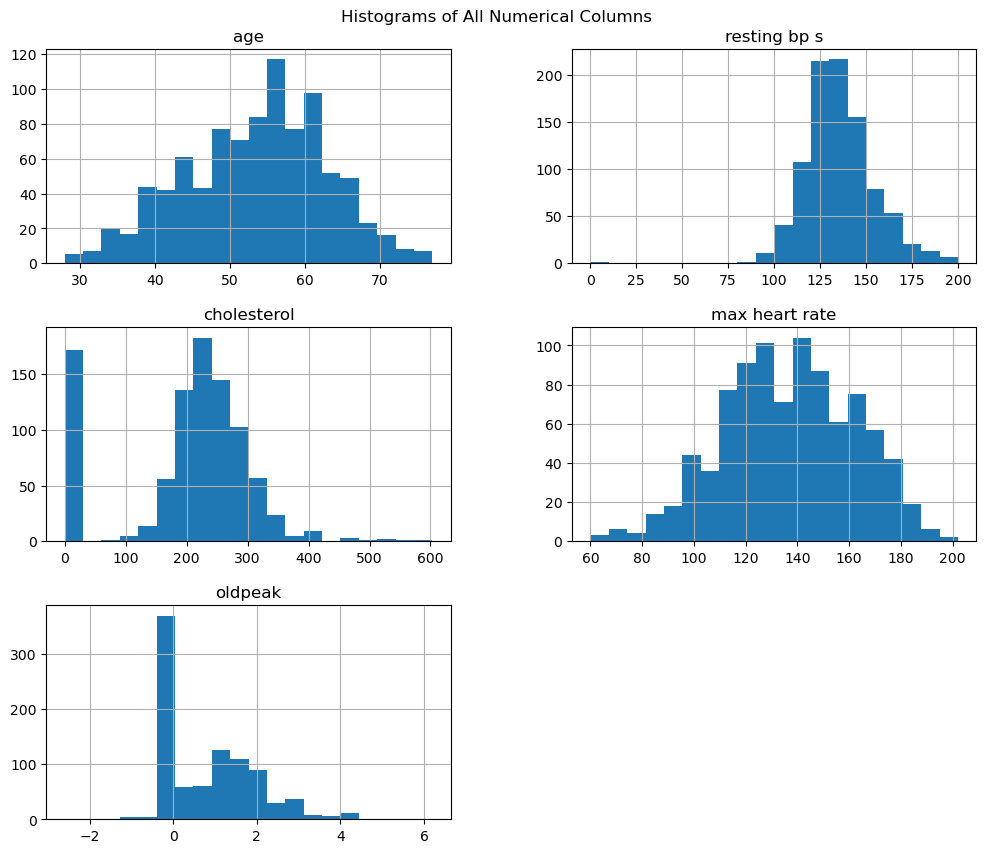

In [19]:
# show all the df columns in histogram
numerical_data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of All Numerical Columns', y=0.92)
plt.show()

We can see some of the data are fairly distributed but some scaling methods can be used to normalize the distribution

<Figure size 2000x800 with 0 Axes>

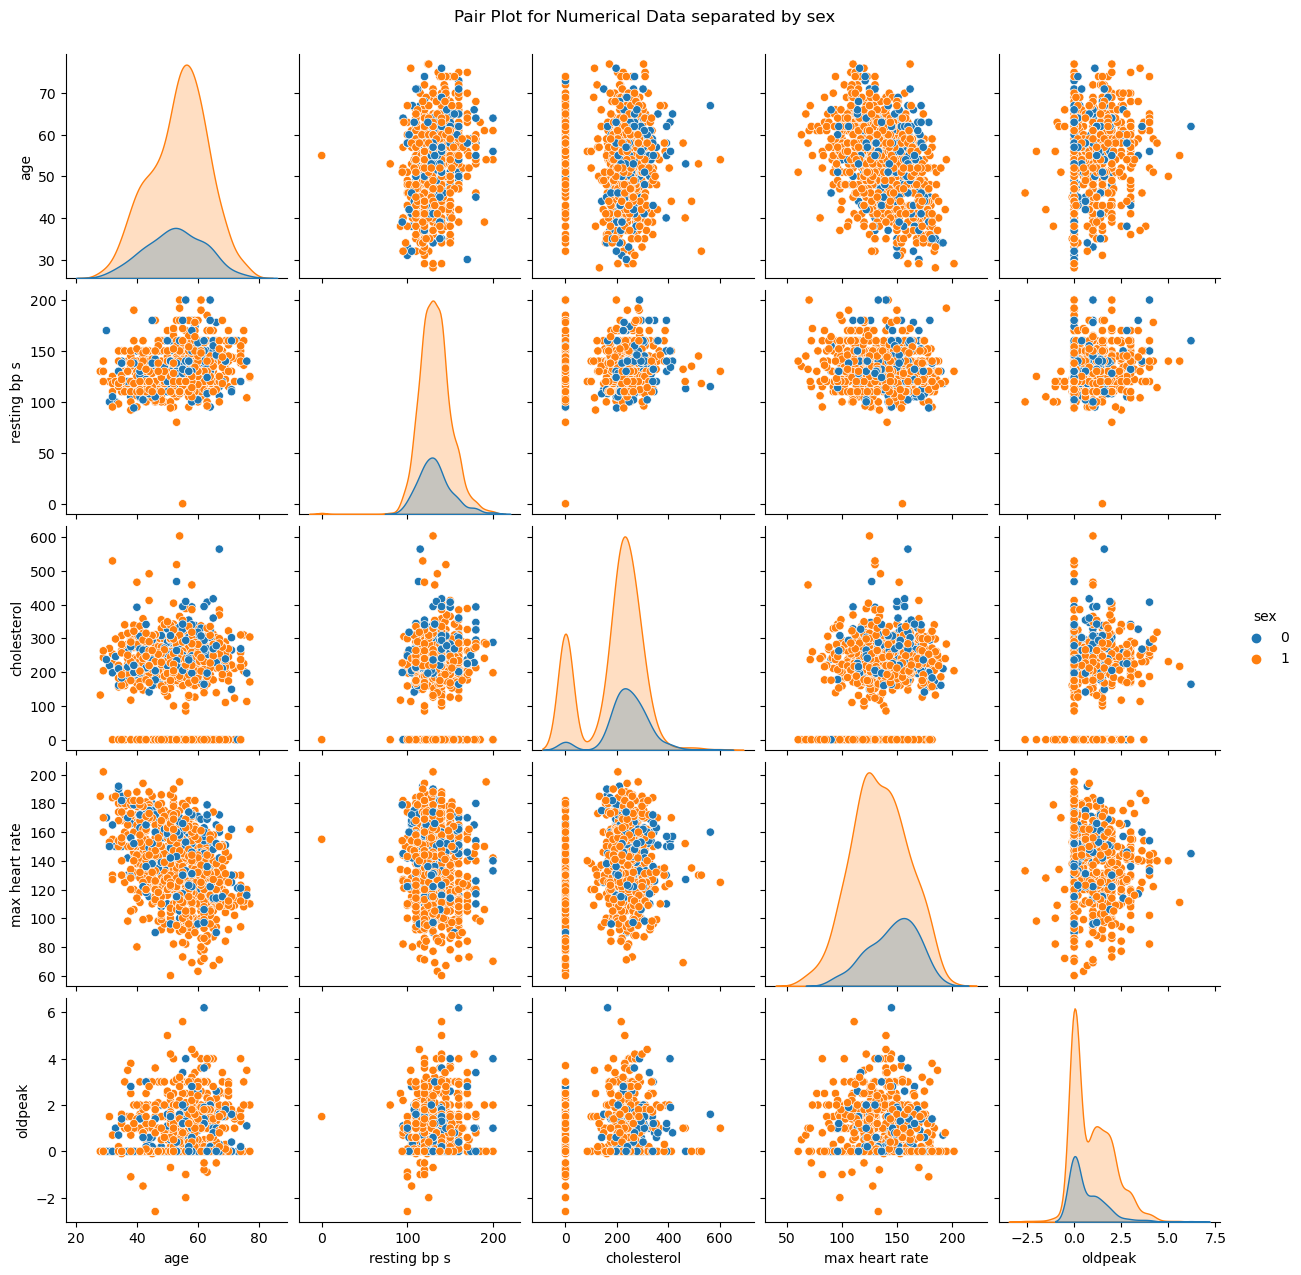

<Figure size 2000x800 with 0 Axes>

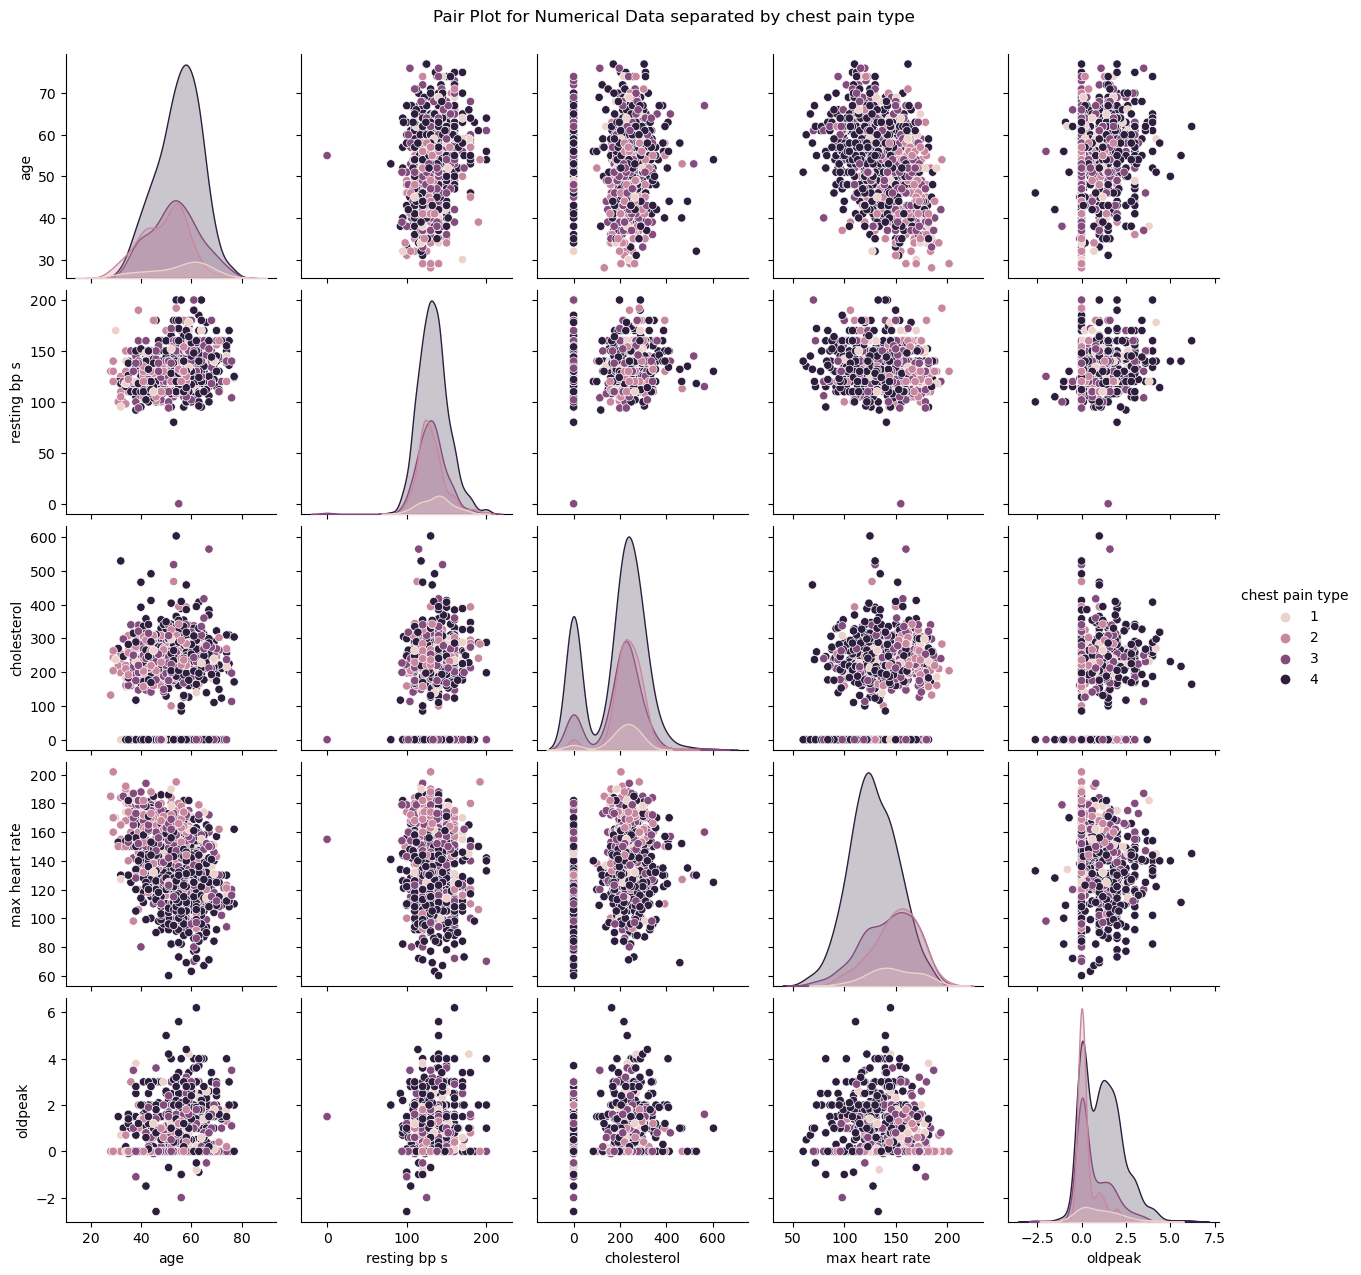

<Figure size 2000x800 with 0 Axes>

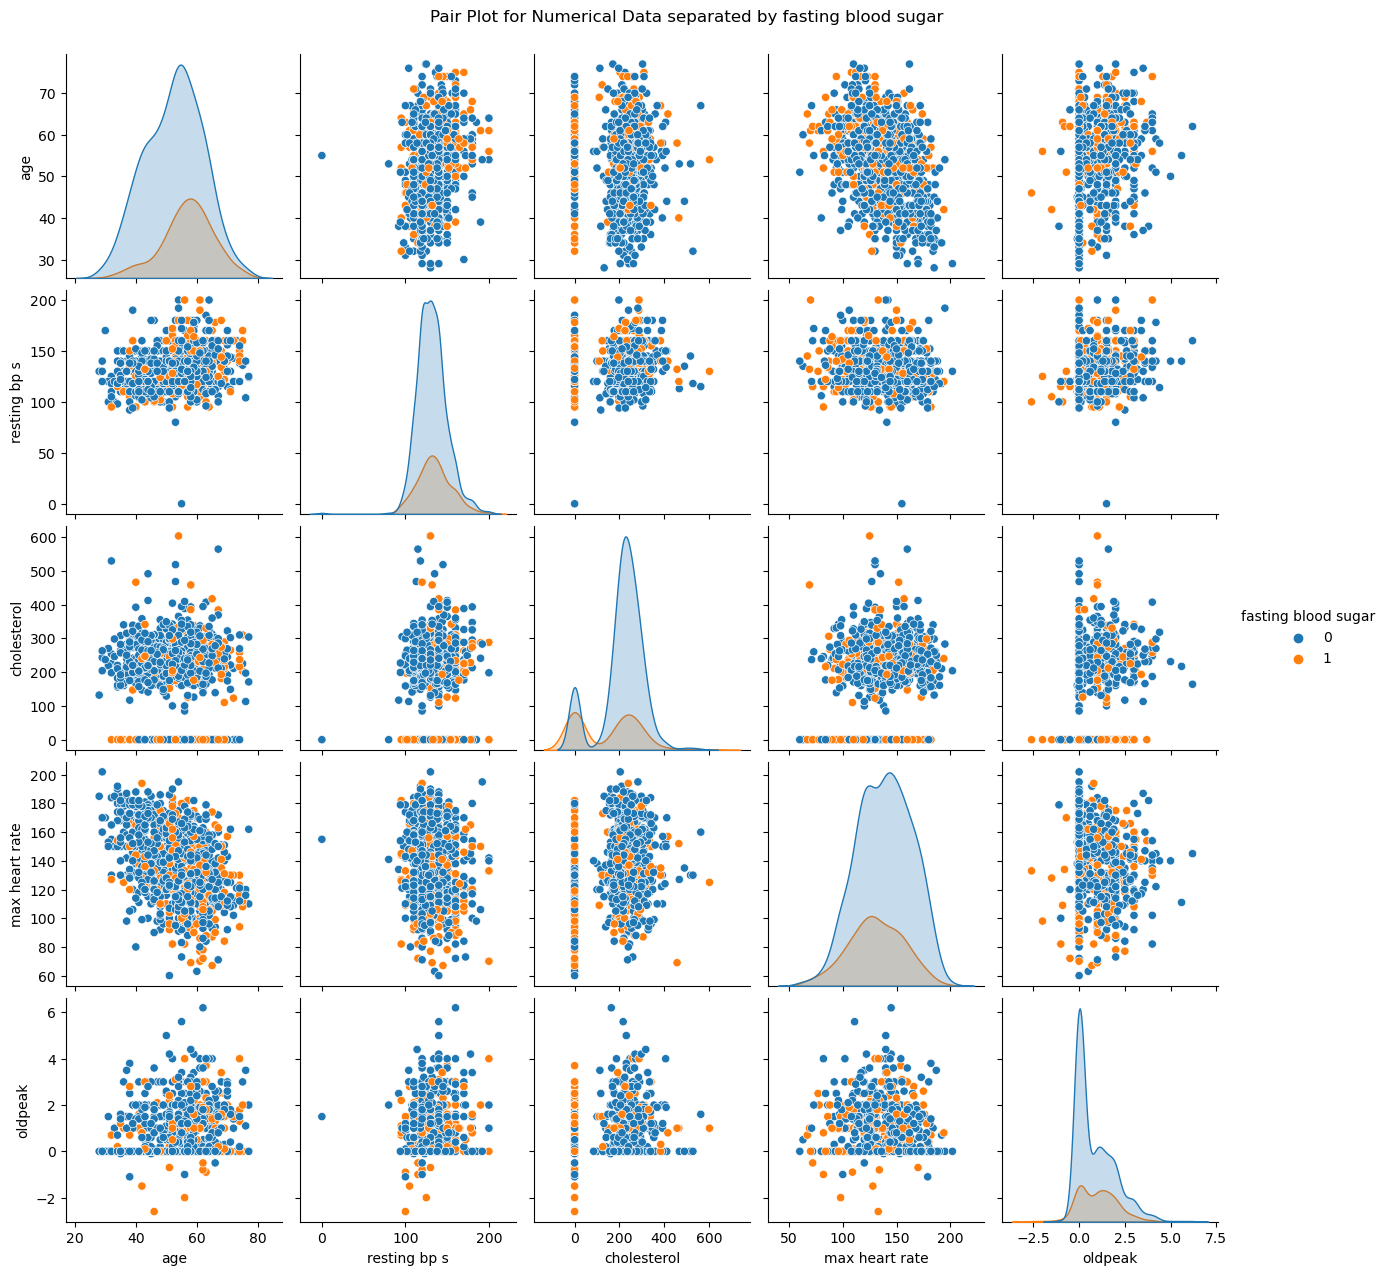

<Figure size 2000x800 with 0 Axes>

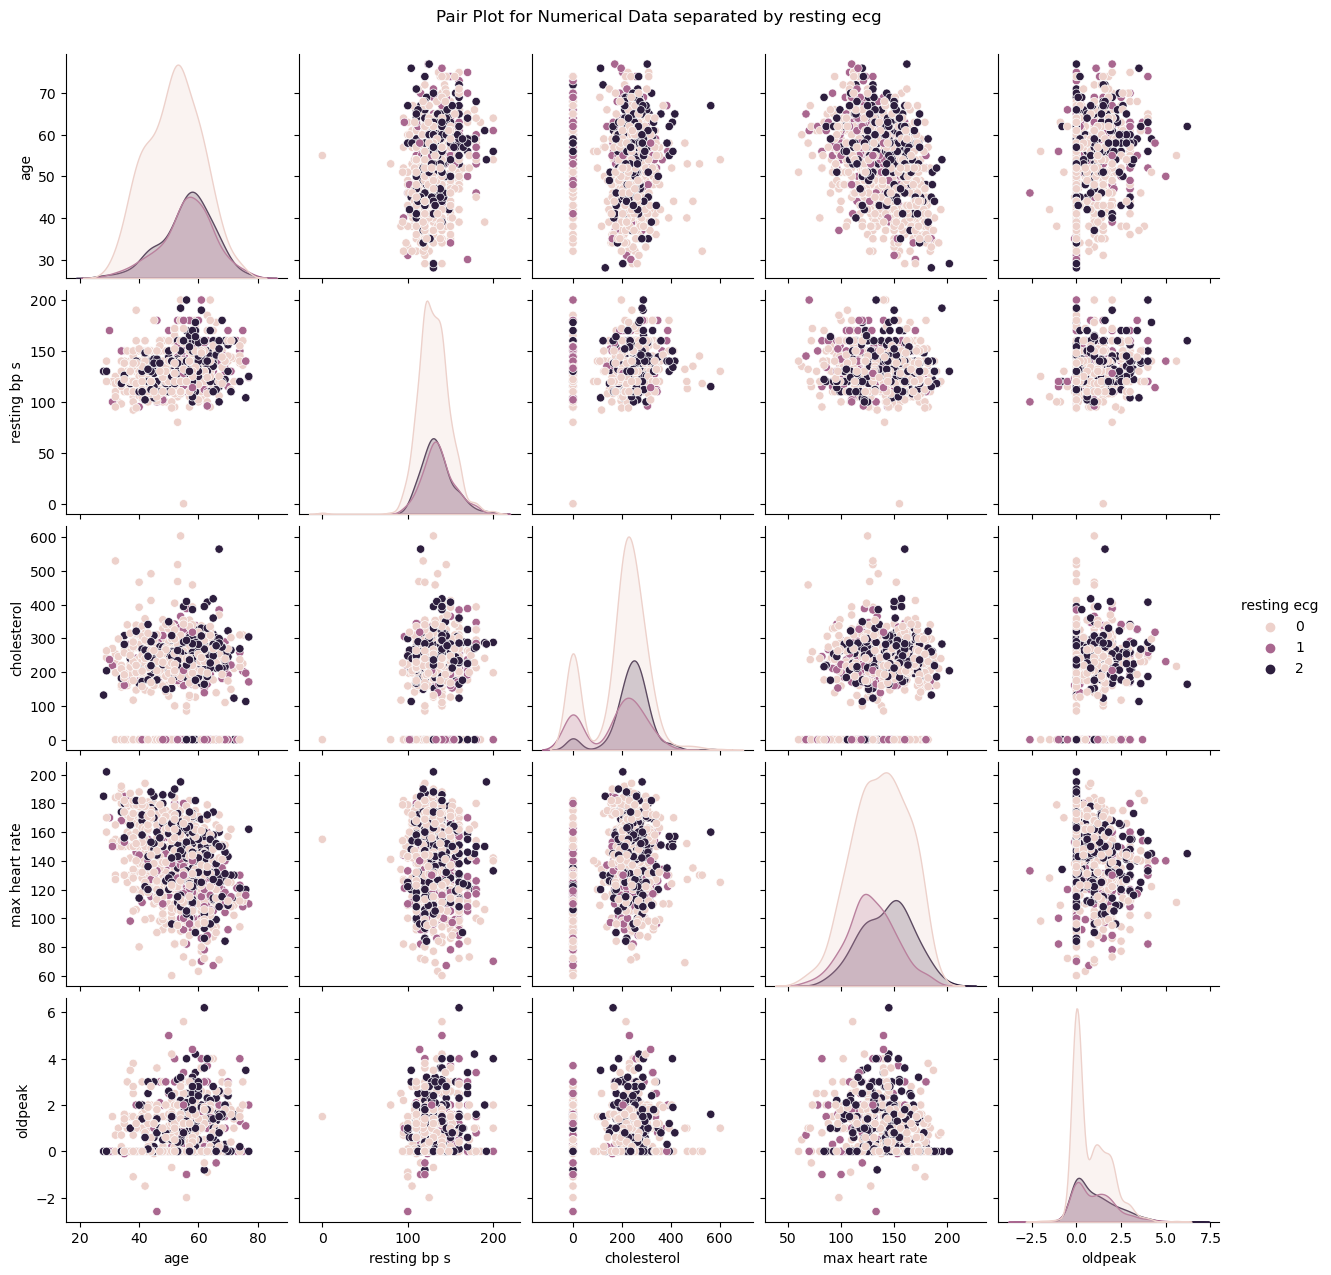

<Figure size 2000x800 with 0 Axes>

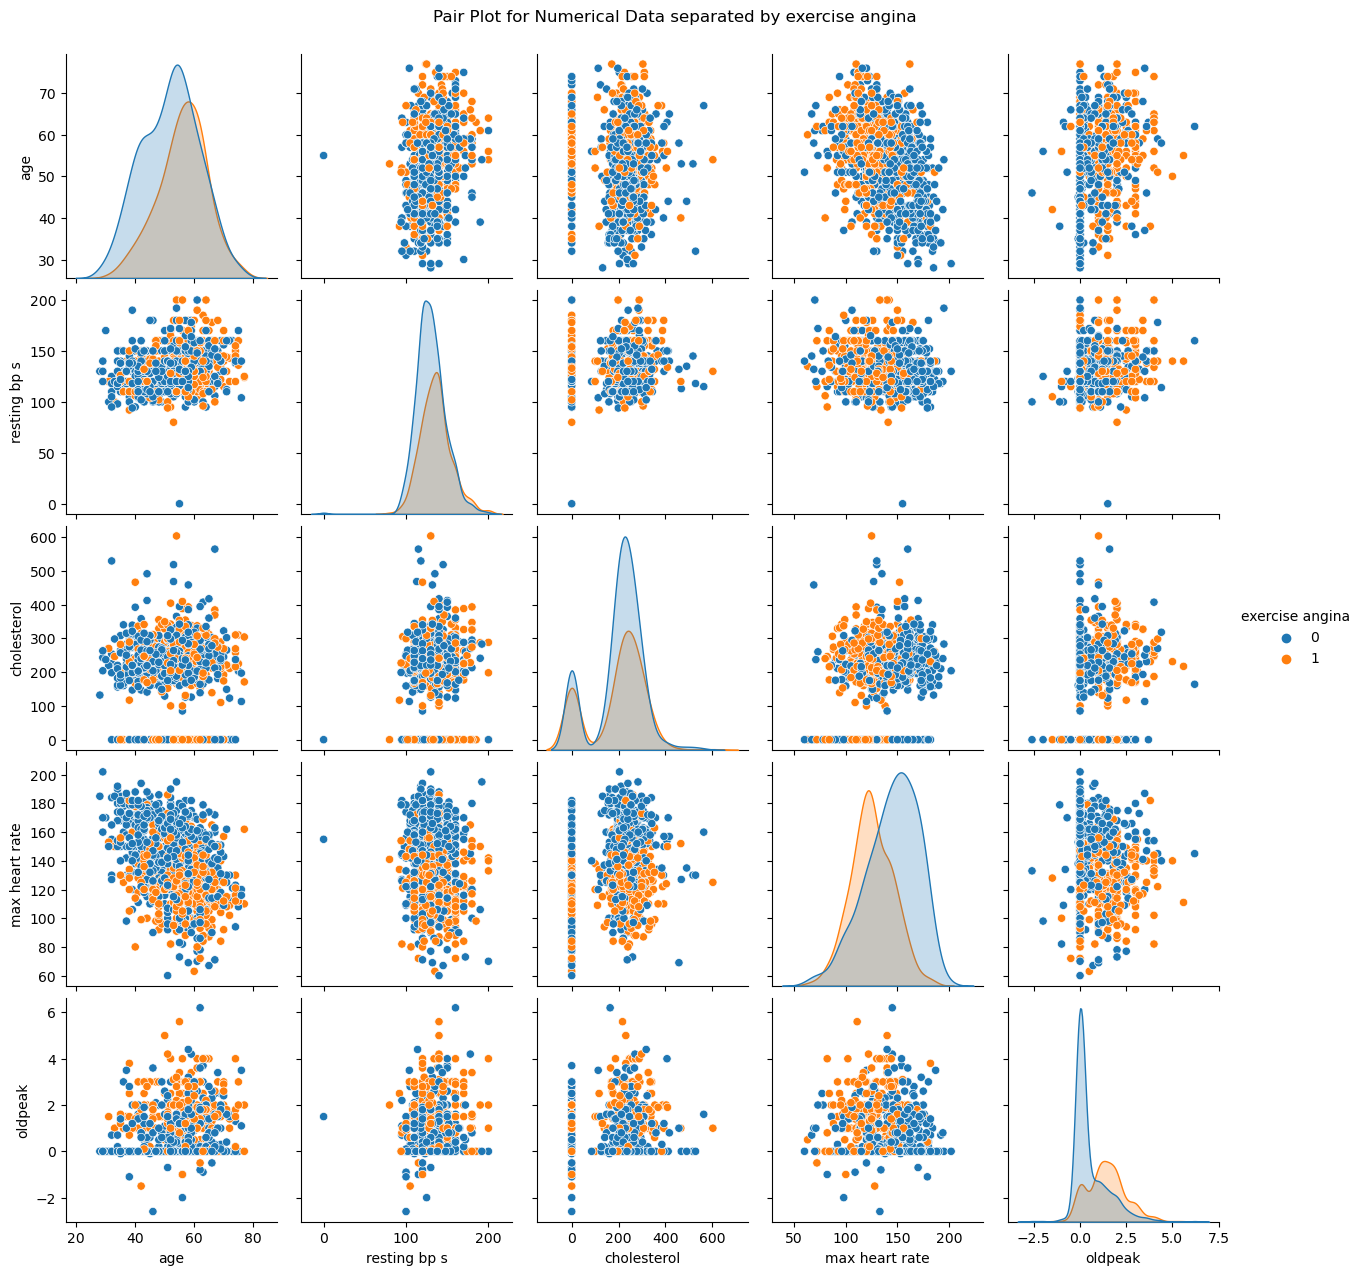

<Figure size 2000x800 with 0 Axes>

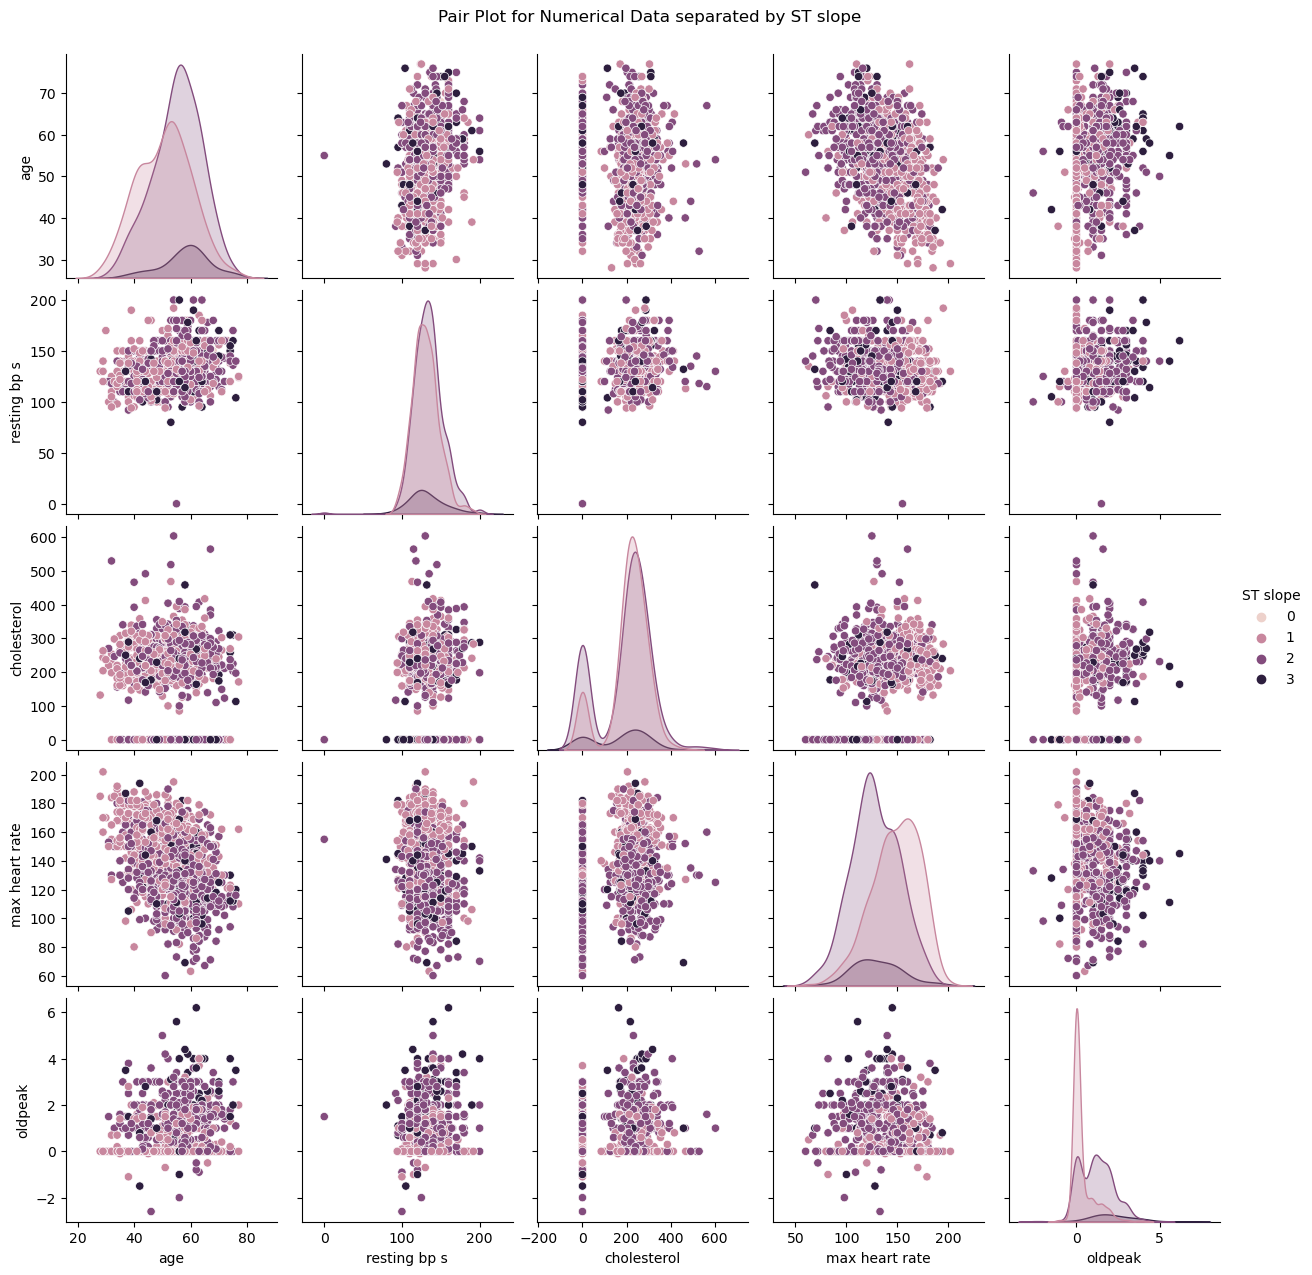

<Figure size 2000x800 with 0 Axes>

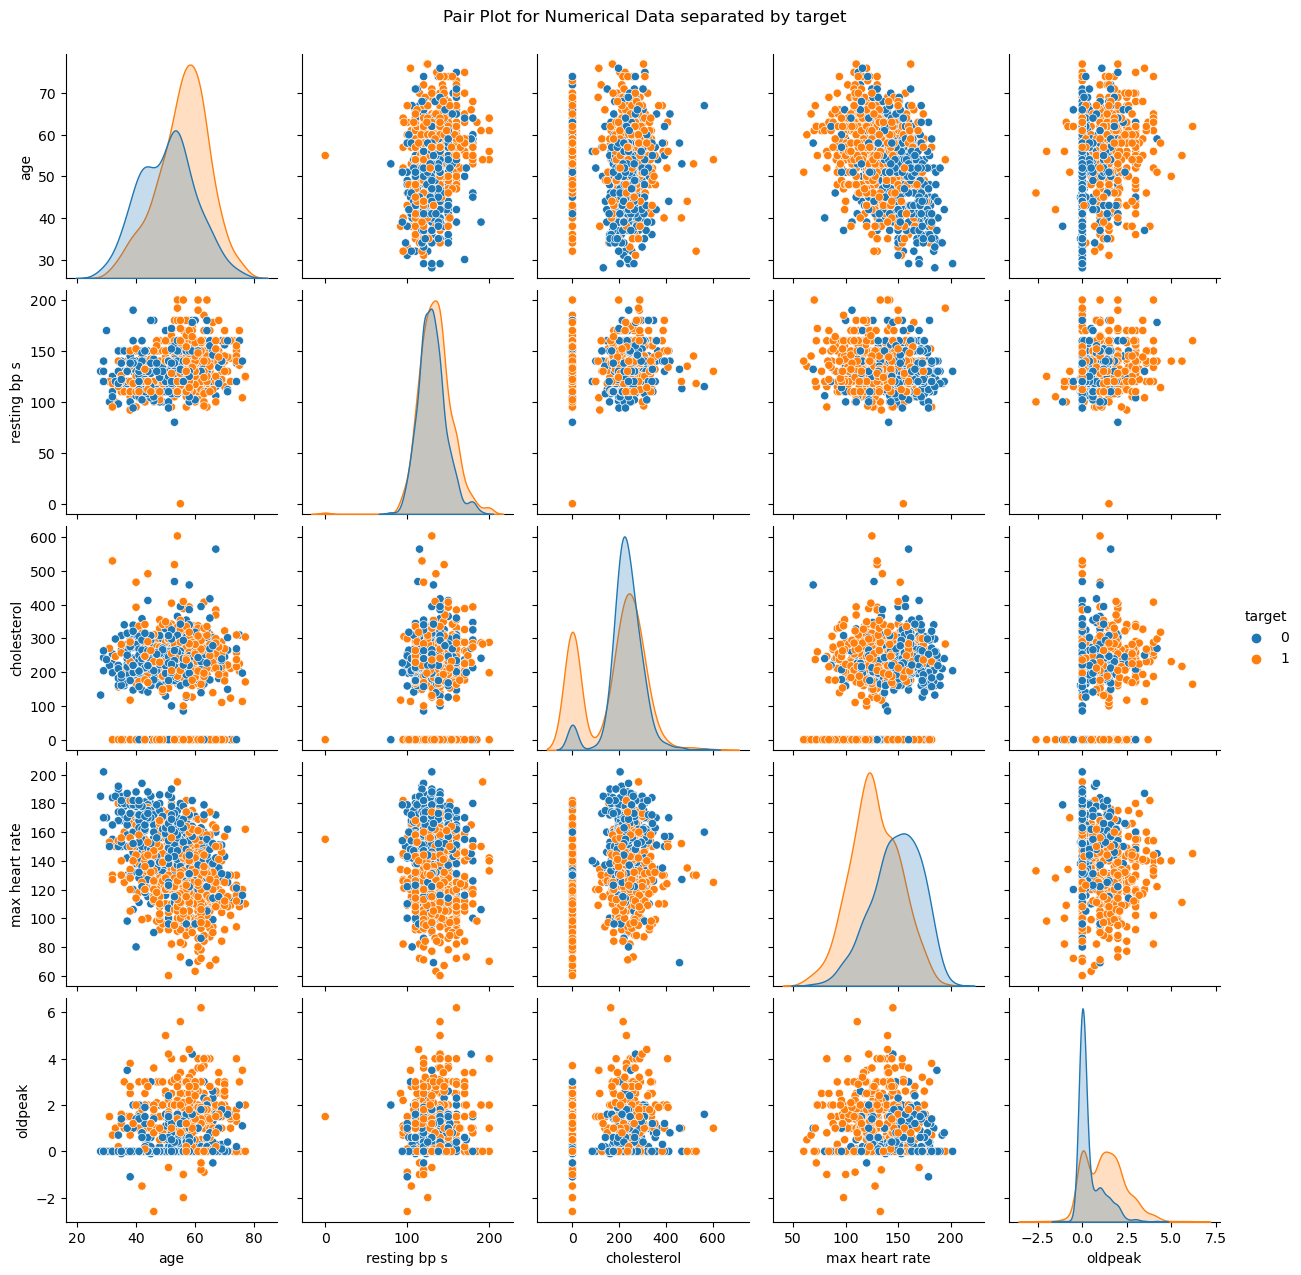

In [20]:
# Create pair plots for numerical data separated by each categorical variable
for cat_col in categorical_data:
    plt.figure(figsize=(20, 8))
    ax = sns.pairplot(df, hue=cat_col, vars=numerical_data)
    ax.fig.suptitle(f'Pair Plot for Numerical Data separated by {cat_col}', y=1.02)
    plt.show()

### You dont see any clusters forming in the numerical data. Maybe you can find the patterns if they are separated into groups like age group

### Lets group the data as per the age group


## Age 

In [21]:
#create a dataframe to store the age group and the target
age_data = df[['age','target']]
age_data

age  target
0      40       0
1      49       1
2      37       0
3      48       1
4      54       0
...   ...     ...
1185   45       1
1186   68       1
1187   57       1
1188   57       1
1189   38       0

[918 rows x 2 columns]

In [22]:
# Create age groups
age_bins = [29, 39, 49, 59, 69, 79]
print('Age Bins:', age_bins)
# Create age groups
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
print('Age Labels:',age_labels)

Age Bins: [29, 39, 49, 59, 69, 79]
Age Labels: ['30-39', '40-49', '50-59', '60-69', '70-79']


In [23]:
# Assign age groups to the dataset
age_data['age_group'] = pd.cut(age_data['age'], bins=age_bins, labels=age_labels, right=False)
age_data

C:\Users\bimal\AppData\Local\Temp\ipykernel_3624\819018484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['age_group'] = pd.cut(age_data['age'], bins=age_bins, labels=age_labels, right=False)


age  target age_group
0      40       0     40-49
1      49       1     50-59
2      37       0     30-39
3      48       1     40-49
4      54       0     50-59
...   ...     ...       ...
1185   45       1     40-49
1186   68       1     60-69
1187   57       1     50-59
1188   57       1     50-59
1189   38       0     30-39

[918 rows x 3 columns]

In [24]:
grouped_age_data = age_data.groupby('age_group')['target']
stats = grouped_age_data.agg(total_samples = ('count'),
                    total_affected = ('sum'))
stats

total_samples  total_affected
age_group                               
30-39                 64              24
40-49                205              76
50-59                360             200
60-69                244             176
70-79                 44              32

In [25]:
stats['affected_ratio'] = stats['total_affected']/stats['total_samples']
stats

total_samples  total_affected  affected_ratio
age_group                                               
30-39                 64              24        0.375000
40-49                205              76        0.370732
50-59                360             200        0.555556
60-69                244             176        0.721311
70-79                 44              32        0.727273

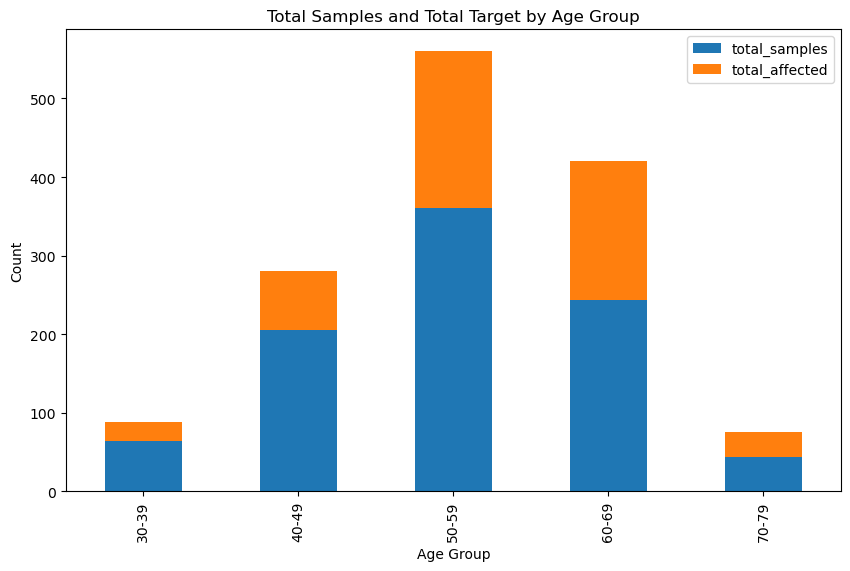

In [26]:
# Bar plot for Total Samples and Total Target
fig, ax = plt.subplots(figsize=(10, 6))
stats[['total_samples', 'total_affected']].plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Total Samples and Total Target by Age Group')
plt.show()

### It is seen that even though we have different number of data for each age group but if we look at the ratio it is clearly evident that the older you get the more likely you are to get a heart disease

## Cholesterol

### Lets try the same for Cholestrol level. Medically, cholestrol level below 200 is said to be normal and 200-240 is said to be borderline high whereas more than 240 is high

In [27]:
#get the data for cholesterol and target
chol_data = df[['cholesterol','target']]
chol_data

cholesterol  target
0             289       0
1             180       1
2             283       0
3             214       1
4             195       0
...           ...     ...
1185          264       1
1186          193       1
1187          131       1
1188          236       1
1189          175       0

[918 rows x 2 columns]

In [28]:
#set the bins and labels
chol_bins = [0,200,240,float('inf')]
chol_labels = ['Normal(<200)', 'Moderately High(200-240)', 'High(>240)']

In [82]:
#create a chol_group column that has the labels for cholestrol based on the bins
chol_data['chol_group'] = pd.cut(chol_data['cholesterol'], bins=chol_bins, labels=chol_labels, right=False)
chol_data

cholesterol  target                chol_group
0             289       0                High(>240)
1             180       1              Normal(<200)
2             283       0                High(>240)
3             214       1  Moderately High(200-240)
4             195       0              Normal(<200)
...           ...     ...                       ...
1185          264       1                High(>240)
1186          193       1              Normal(<200)
1187          131       1              Normal(<200)
1188          236       1  Moderately High(200-240)
1189          175       0              Normal(<200)

[918 rows x 3 columns]

In [83]:
# grouped data based on bins, calculate the total number of samples and total affected
grouped_chol_data = chol_data.groupby('chol_group')['target']
chol_stats = grouped_chol_data.agg(total_samples = ('count'),
                    total_affected = ('sum'))
chol_stats

total_samples  total_affected
chol_group                                             
Normal(<200)                        318             209
Moderately High(200-240)            237             108
High(>240)                          363             191

In [84]:
chol_stats['affected_ratio'] = chol_stats['total_affected']/chol_stats['total_samples']
chol_stats

total_samples  total_affected  affected_ratio
chol_group                                                             
Normal(<200)                        318             209        0.657233
Moderately High(200-240)            237             108        0.455696
High(>240)                          363             191        0.526171

In [85]:
min(chol_data['cholesterol'])

0

In [86]:
(chol_data['cholesterol']==0).sum()

172

## Outlier Handling for cholestrol

### At initial inspecction it seemed as if the lowest cholesterol had more chance of being a heart disease victim but upon deeper inspection it is seen that about half of the data is invalid in that group. Lets deal with that
### We can just impute the 0 values with mean but lets try KNN imputer just to be more precise

In [87]:
# we can use knn to impute the null values so we replace the 0 values with nnull values so we can use knn imputer
df["cholesterol"] = df["cholesterol"].replace(0,np.nan)

In [91]:
chol_stats.columns

Index(['total_samples', 'total_affected', 'affected_ratio'], dtype='object')

In [88]:
# Specify the number of neighbors (k) you want to consider
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation to the DataFrame
df = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

In [92]:
for i in range(len(chol_bins)-1):
    total_target = sum(df[(df['cholesterol'] > chol_bins[i]) & (df['cholesterol'] < chol_bins[i+1])]['target'])
    total_sample = len(df[(df['cholesterol'] > chol_bins[i]) & (df['cholesterol'] < chol_bins[i+1])]['target'])
    print(f'{chol_stats.index[i]}: {total_target}({round(total_target/total_sample*100,3)}%) out of {total_sample} affected.')
    print('-'*50)

Normal(<200): 64.0(41.558%) out of 154 affected.
--------------------------------------------------
Moderately High(200-240): 168.0(55.446%) out of 303 affected.
--------------------------------------------------
High(>240): 273.0(60.938%) out of 448 affected.
--------------------------------------------------


### Now it is more evident that high cholesterol level indeed leads to heart problems

## Resting BPS

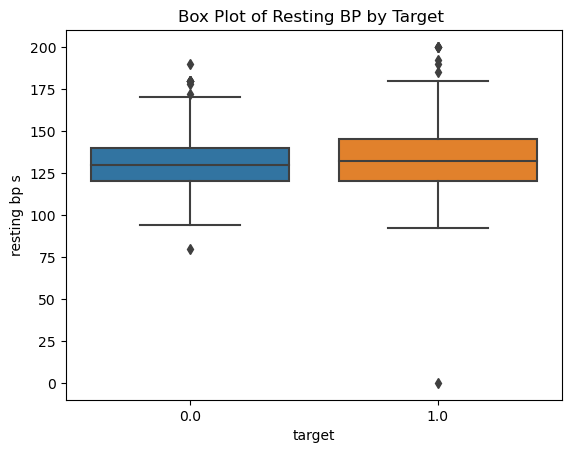

In [37]:
# Assuming you have a DataFrame df with continuous and target variables
sns.boxplot(x="target", y="resting bp s", data=df)
plt.title("Box Plot of Resting BP by Target ")
plt.show()

### We dont see any huge difference in resting bp between target = 0 and target = 1. The range are also similar and we see some otliers which will be handled later.

## Max Heart Rate

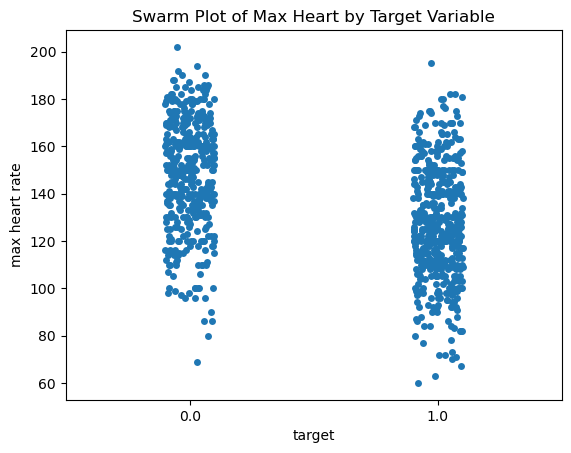

In [38]:
sns.stripplot(x="target", y="max heart rate", data=df)
plt.title("Swarm Plot of Max Heart by Target Variable")
plt.show()

### We dont see any huge difference in max heart rate between target = 0 and target = 1. The range for the affected is a little lower in comparision to the other group.

## Old Peak

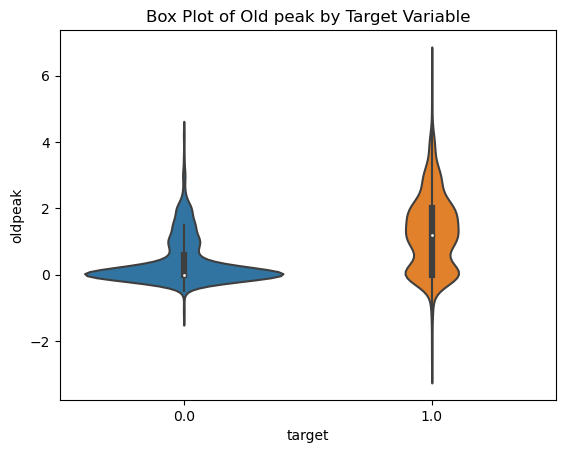

In [39]:
sns.violinplot(x="target", y="oldpeak", data=df)
plt.title("Box Plot of Old peak by Target Variable")
plt.show()

### We see that peole with heart disease tend to have higher old peak mostly ranging from 0 to 4 but the other group mostly have it around 0 with few portions around 2

## Exploration on Categorical Features

### Now Lets Explore the Categorial features we have

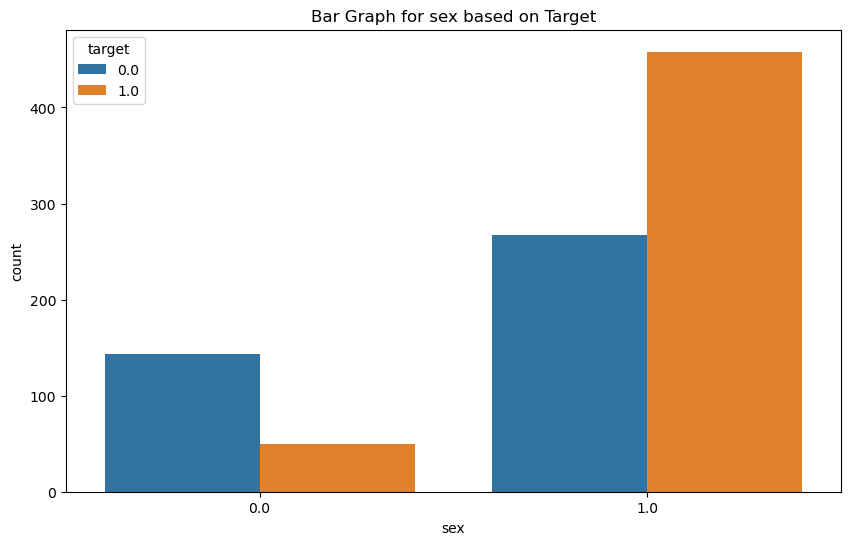

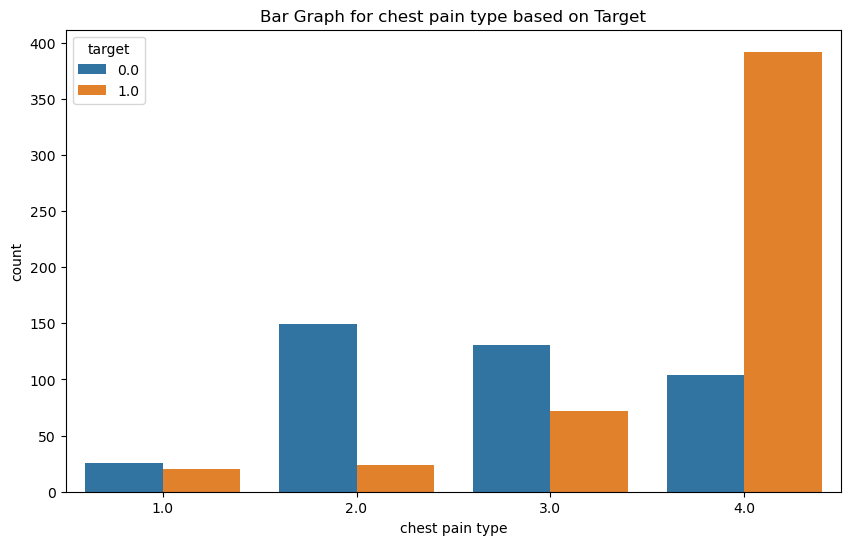

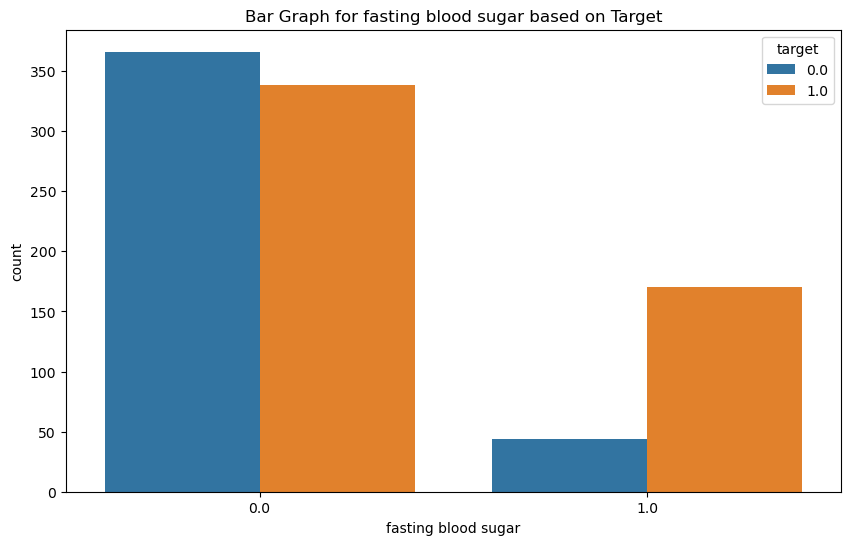

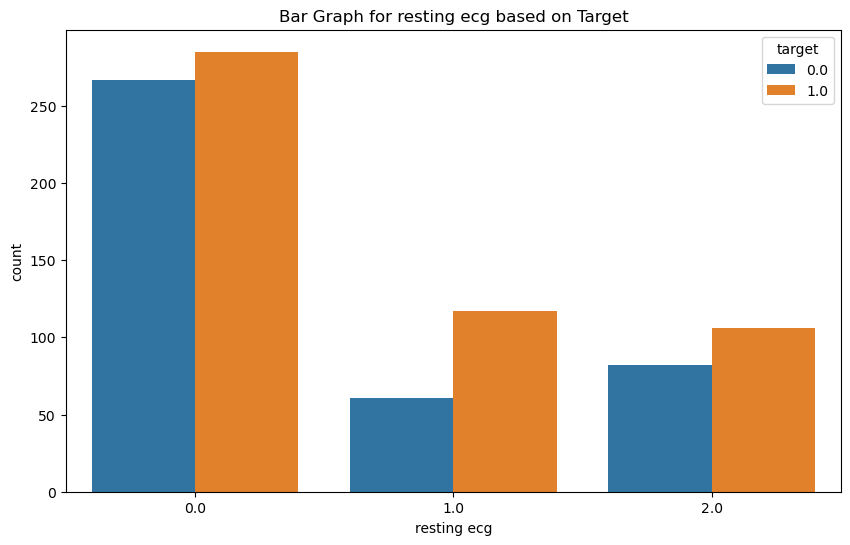

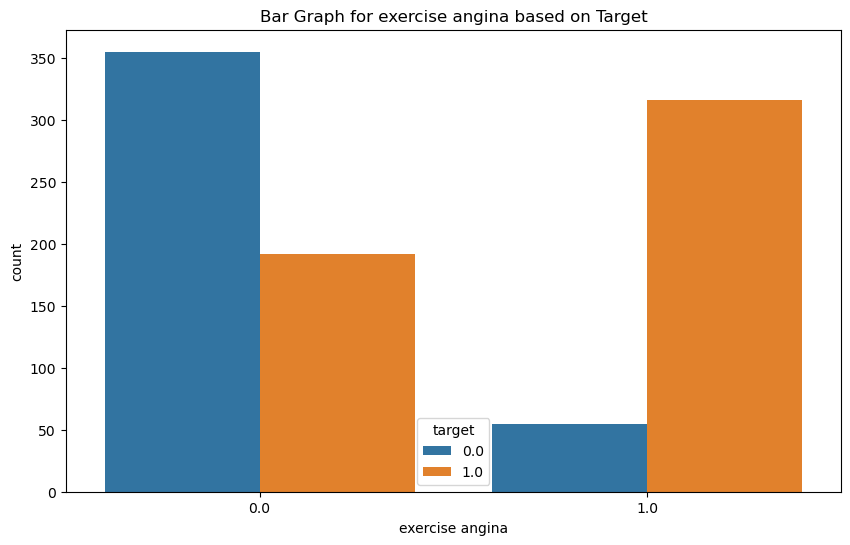

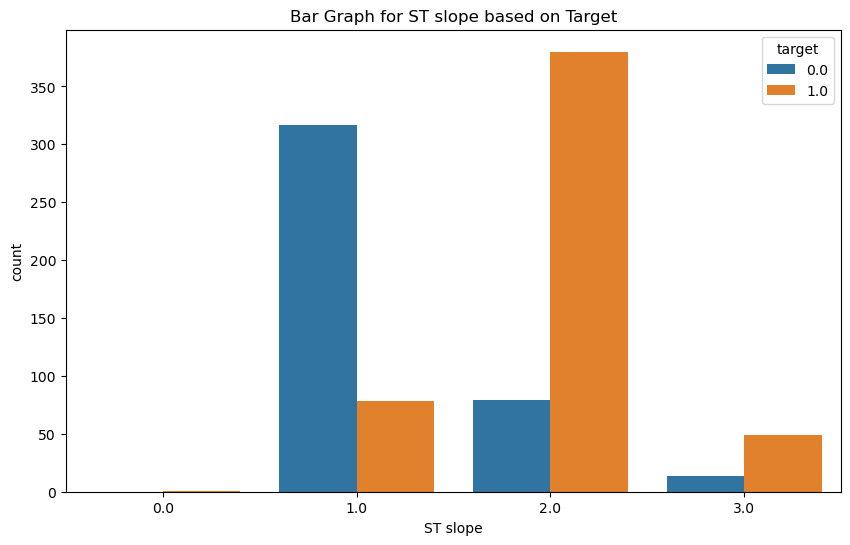

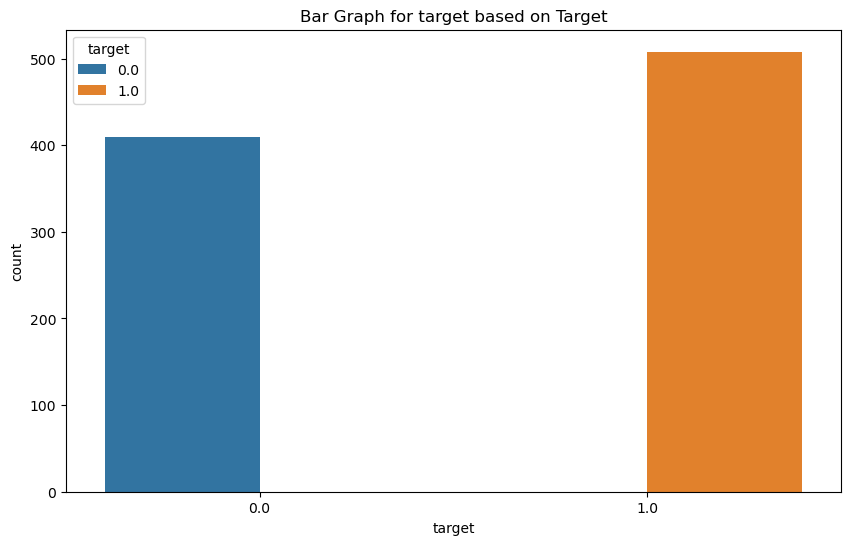

In [40]:
# Create bar graphs for each categorical variable based on target
for cat_col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cat_col, hue='target', data=df)
    plt.title(f'Bar Graph for {cat_col} based on Target')
    plt.show()

In [41]:
# Create a dictionary to store the results
result_dict = {}

# Loop through each categorical column
for cat_col in categorical_columns:
    # Calculate count, sum, and percentage for each category in 'target'
    cat_count = df.groupby(cat_col)['target'].count()
    cat_sum = df.groupby(cat_col)['target'].sum()
    cat_percentage = (cat_sum / cat_count * 100).round(1)

    # Create a DataFrame to store the results
    result_df = pd.DataFrame({
        f'{cat_col}_count': cat_count,
        f'{cat_col}_sum': cat_sum,
        f'{cat_col}_percentage': cat_percentage
    })

    # Store the results in the dictionary
    result_dict[cat_col] = result_df

# Print or use result_dict as needed
for cat_col, result_df in result_dict.items():
    print(f"Results for {cat_col}:\n{result_df}")
    print('-'*75)


Results for sex:
     sex_count  sex_sum  sex_percentage
sex                                    
0.0        193     50.0            25.9
1.0        725    458.0            63.2
---------------------------------------------------------------------------
Results for chest pain type:
                 chest pain type_count  chest pain type_sum  \
chest pain type                                               
1.0                                 46                 20.0   
2.0                                173                 24.0   
3.0                                203                 72.0   
4.0                                496                392.0   

                 chest pain type_percentage  
chest pain type                              
1.0                                    43.5  
2.0                                    13.9  
3.0                                    35.5  
4.0                                    79.0  
---------------------------------------------------------------

## Conclusions from each features:

1. Sex:
  - Is any one of the gender more likely to be a victim of heart disease?
  -> From the data we were given, it is evident that one gender(likely male) even though having more samples have higher chances of getting heart disease
  
2. Chest Pain Type:
  - What types of chest pain are observed more in patients diagnosed with the disease?
  -> Chest pain types probably ordered from 1-4 has increasing chances of being a victim as patients with chest pain type 4 has highest probability at 77%. Even though we see high chances for the chest pain type 1. This might be because of low number of samples from that category.

3. Fasting Blood Sugar:
  - How fasting blood sugar is related to heart disease?¶
  -> This category has two values which represents the fasting blood sugar type 1 and type 2, where the type 2 is more likely to be a symptom of heart disease

4. Resting ECG:
  - How the categories in resting ecg show symptom of heart disease?
  -> Even though the percentage are close for all three types, the type 1 has more probablity of being a victim
  
5. Excercise angina:
  - How likely is angina(a chest pain) a symptom of heart disease?
  -> 83% of the time angina is a symptom of heart disease.

6. ST Slope:
   - Which category of ST slope is likely to lead to heart disease?
   -> ST slope, a sensitive and specific marker of transient myocardial ischemia categorized into 4 levels, can help conclude  higher the level higher the chances of heart disease. We dont take the 100% from the 1st category as there is only one sample

### It seems all these categories have positive correlation to the target so its okay for them to be label enoced. If the categories didnt show any orders then it is better to have them in one hot encoded

In [42]:
# Lets create various heatmap to see the relationships

## Numeric Variables

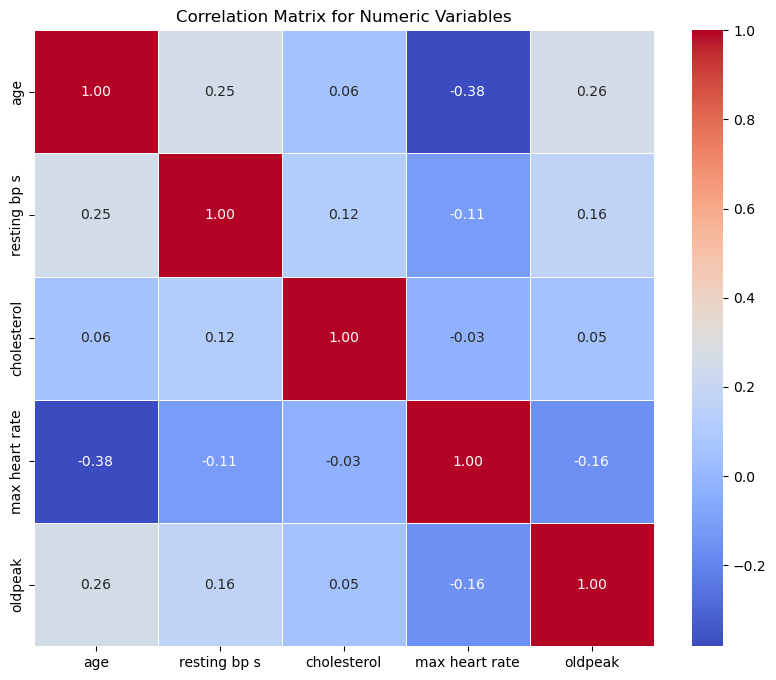

In [43]:
# Calculate the Pearson correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

In [93]:
from scipy.stats import chi2_contingency

for cat_col in categorical_columns[:-1]:
    # Create a contingency table
    contingency_table = pd.crosstab(df[cat_col], df['target'])
    
    # Perform chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-squared test for {cat_col} vs target variable:")
    print(f"Chi2 value: {chi2}")
    print(f"P-value: {p}")
    print("-" * 50)

Chi-squared test for sex vs target variable:
Chi2 value: 84.14510134633775
P-value: 4.5976174508091635e-20
--------------------------------------------------
Chi-squared test for chest pain type vs target variable:
Chi2 value: 268.06723902181767
P-value: 8.08372842808765e-58
--------------------------------------------------
Chi-squared test for fasting blood sugar vs target variable:
Chi2 value: 64.3206790933594
P-value: 1.0573018731809955e-15
--------------------------------------------------
Chi-squared test for resting ecg vs target variable:
Chi2 value: 10.931469339140978
P-value: 0.0042292328167544925
--------------------------------------------------
Chi-squared test for exercise angina vs target variable:
Chi2 value: 222.25938271530583
P-value: 2.907808387659878e-50
--------------------------------------------------
Chi-squared test for ST slope vs target variable:
Chi2 value: 356.03804051508064
P-value: 7.348941512630764e-77
--------------------------------------------------


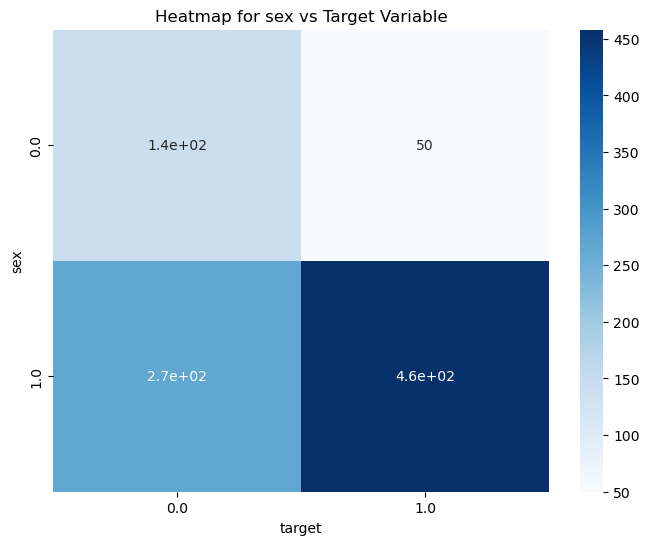

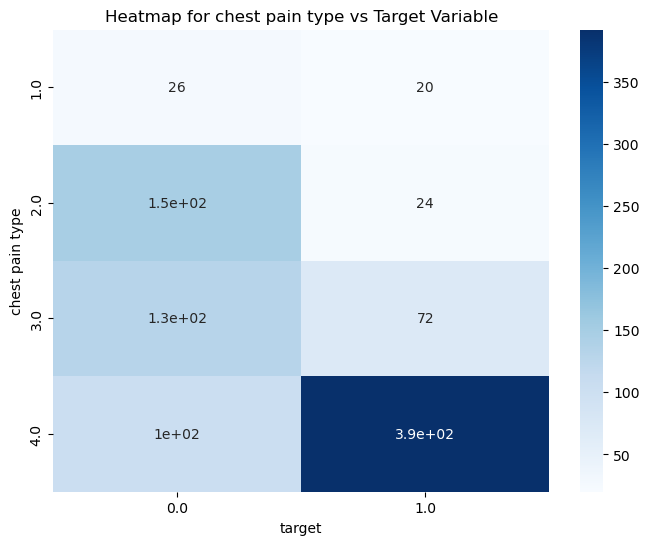

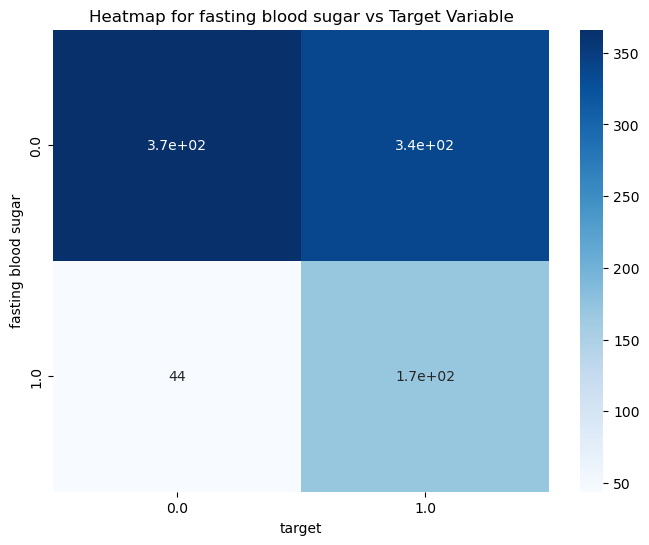

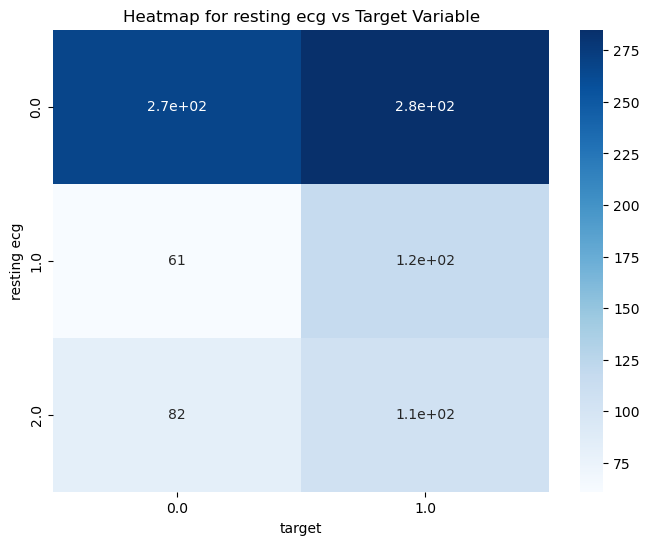

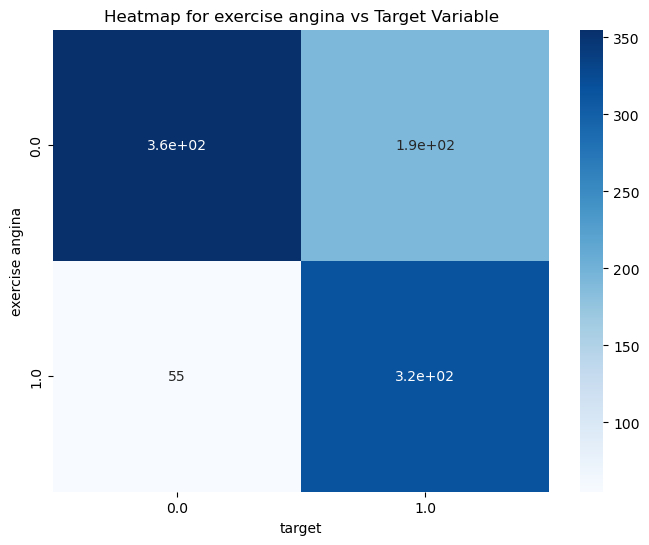

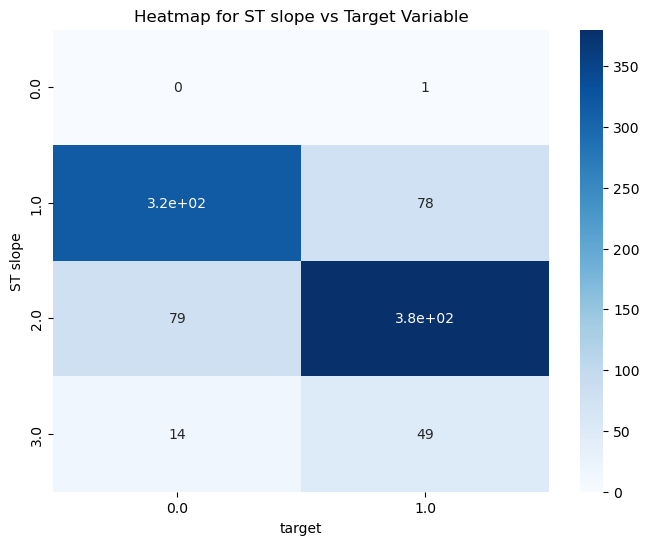

In [94]:
for cat_feature in categorical_columns[:-1]:
    contingency_table = pd.crosstab(df[cat_feature], df['target'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, cmap='Blues')
    plt.title(f'Heatmap for {cat_feature} vs Target Variable')
    plt.show()

## Outlier Detection

### Outlier Detection for Numerical Variables
For detecting outlier in the numerical variables different methods can be used like detection with the help of z score, IQR, graphs. Lets use IQR method and visualize these 

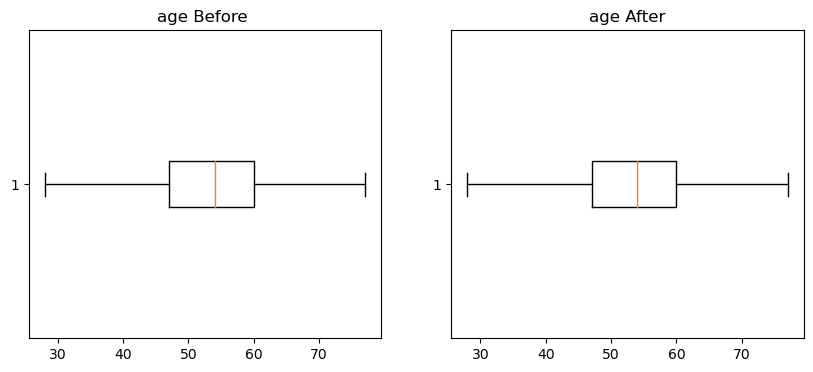

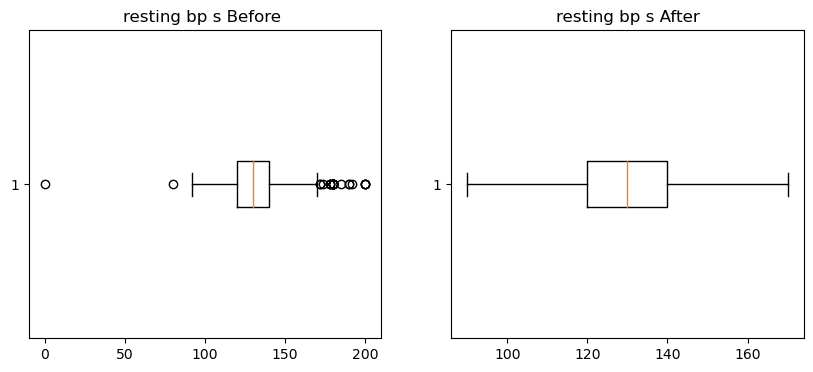

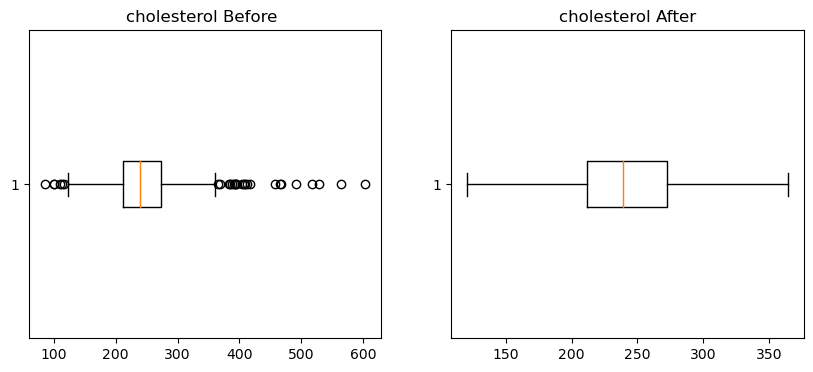

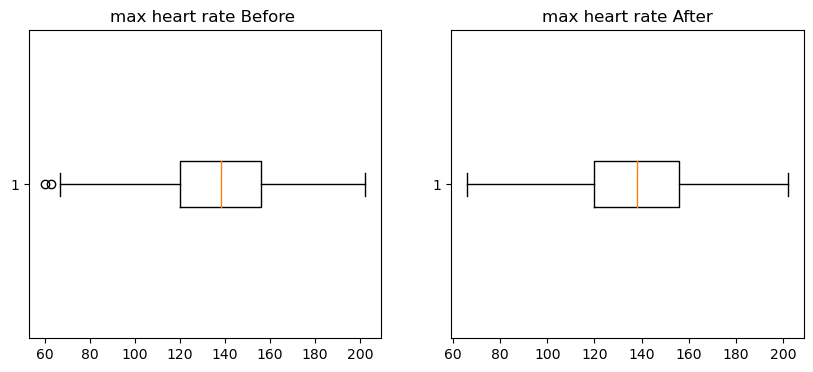

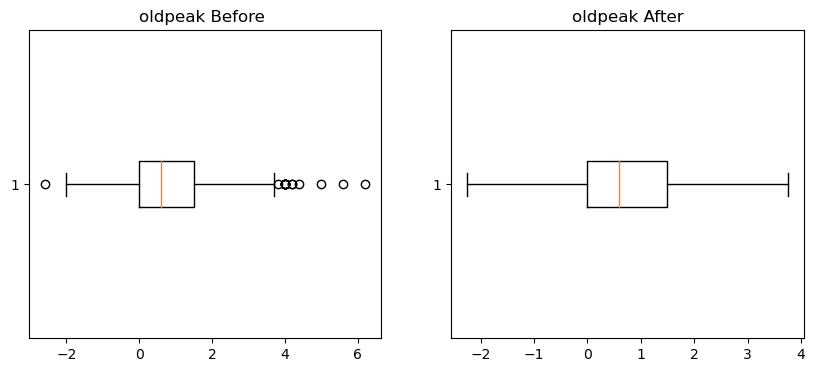

In [46]:
# defining function for dealing with outliers
def impute_outliers(data,col):
    df = pd.DataFrame(data)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

# Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

# Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    fixed=[]
# Identify outliers
# Replace outliers with a suitable value (e.g., the nearest non-outlier value)
    for index, value in df[col].items():    
        if(value<lower_bound):
            value = lower_bound
        elif(value>upper_bound):
            value = upper_bound
        else:
            value=value
        fixed.append(value)
    # Create a figure and two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Create boxplots for the two datasets on the respective subplots
    ax1.boxplot(df[col], vert=False)
    ax2.boxplot(fixed, vert=False)

    # Set titles for the subplots
    ax1.set_title(f'{col} Before ')
    ax2.set_title(f'{col} After')

    # Display the plots
    plt.show()
    df[col]=fixed
    
for col in numerical_columns:
    impute_outliers(df,col)

## Pipeline
### Pipeline can be used to initiaize steps during model creation. The scaling are also be done inside it. Since the categorical data are already label encoded we only deal with the numerical data scale them to get the final dataframe


### Train Test Split 
### It is a better practice to split the dataframe into test and train before using transformation, so the train data can have the least amount of info on the test data

In [47]:
df

age  sex  chest pain type  resting bp s  cholesterol  \
0    40.0  1.0              2.0         140.0        289.0   
1    49.0  0.0              3.0         160.0        180.0   
2    37.0  1.0              2.0         130.0        283.0   
3    48.0  0.0              4.0         138.0        214.0   
4    54.0  1.0              3.0         150.0        195.0   
..    ...  ...              ...           ...          ...   
913  45.0  1.0              1.0         110.0        264.0   
914  68.0  1.0              4.0         144.0        193.0   
915  57.0  1.0              4.0         130.0        131.0   
916  57.0  0.0              2.0         130.0        236.0   
917  38.0  1.0              3.0         138.0        175.0   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                    0.0          0.0           172.0              0.0   
1                    0.0          0.0           156.0              0.0   
2                    0.0          1.0            98.0              0.0   
3                    0.0          0.0           108.0              1.0   
4                    0.0          0.0           122.0              0.0   
..                   ...          ...             ...              ...   
913                  0.0          0.0           132.0              0.0   
914                  1.0          0.0           141.0              0.0   
915                  0.0          0.0           115.0              1.0   
916                  0.0          2.0           174.0              0.0   
917                  0.0          0.0           173.0              0.0   

     oldpeak  ST slope  target  
0        0.0       1.0     0.0  
1        1.0       2.0     1.0  
2        0.0       1.0     0.0  
3        1.5       2.0     1.0  
4        0.0       1.0     0.0  
..       ...       ...     ...  
913      1.2       2.0     1.0  
914      3.4       2.0     1.0  
915      1.2       2.0     1.0  
916      0.0       2.0     1.0  
917      0.0       1.0     0.0  

[918 rows x 12 columns]

In [48]:
X = df.drop('target',axis = 1)
y = df['target']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(734, 11)
(184, 11)


In [49]:
print(numerical_columns)
print(categorical_columns)

['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']


In [50]:
# Create a ColumnTransformer to apply transformations separately to numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        # Add transformers for categorical columns if needed
    ],
    remainder='passthrough'  # Retain non-transformed columns
)

# Create a Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
train_T = pd.DataFrame(pipeline.fit_transform(X_train), columns=numerical_columns + X_train.columns.difference(numerical_columns).tolist())

test_T = pd.DataFrame(pipeline.transform(X_test), columns=numerical_columns + X_test.columns.difference(numerical_columns).tolist())

# Print the transformed DataFrame
print(train_T.head())
print(test_T.head())

        age  resting bp s  cholesterol  max heart rate   oldpeak  ST slope  \
0  0.857143        0.6250     0.850760        0.669118  0.708333       1.0   
1  0.367347        0.3125     0.564811        0.345588  0.625000       1.0   
2  0.755102        0.8750     0.983053        0.625000  0.508333       0.0   
3  0.775510        0.6250     0.075082        0.205882  0.541667       1.0   
4  0.632653        0.6250     0.559059        0.375000  0.541667       1.0   

   chest pain type  exercise angina  fasting blood sugar  resting ecg  sex  
0              4.0              1.0                  0.0          1.0  2.0  
1              4.0              0.0                  0.0          1.0  2.0  
2              3.0              0.0                  2.0          0.0  1.0  
3              4.0              0.0                  0.0          1.0  2.0  
4              4.0              0.0                  1.0          1.0  2.0  
        age  resting bp s  cholesterol  max heart rate   oldpeak  ST 

# Future Work

## Test Multiple models

In [53]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Define models
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(n_estimators = 100, random_state = 0),
#     'SVM': SVC(),
#     'kNN': KNeighborsClassifier()
# }

# # Create a pipeline for each model
# pipelines = {}
# for model_name, model in models.items():
#     pipelines[model_name] = Pipeline([
#         ('preprocessor', preprocessor),
#         ('model', model)
#     ])

# # Train and evaluate each model
# for model_name, pipeline in pipelines.items():
#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"{model_name} - Accuracy: {accuracy:.4f}")


### Let's use three models from here for further tuning

## Decision Tree

In [54]:

# # Create a pipeline with preprocessing and Decision Tree
# pipeline_dt = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', DecisionTreeClassifier())
# ])

# # Define hyperparameters to tune for Decision Tree
# param_grid_dt = {
#     'model__criterion': ['gini', 'entropy'],
#     'model__max_depth': [None, 5, 10, 15, 20],
#     'model__min_samples_split': [2, 5, 10],
#     'model__min_samples_leaf': [1, 2, 4]
# }

# # Create GridSearchCV for Decision Tree
# grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search_dt.fit(X_train, y_train)

# # Print the best parameters and best accuracy for Decision Tree
# print("Best Parameters (Decision Tree): ", grid_search_dt.best_params_)
# print("Best Accuracy (Decision Tree): {:.4f}".format(grid_search_dt.best_score_))

# # Evaluate the best Decision Tree model on the test set
# best_decision_tree = grid_search_dt.best_estimator_
# y_pred_dt = best_decision_tree.predict(X_test)
# accuracy_dt = accuracy_score(y_test, y_pred_dt)
# print("Test Accuracy of Best Decision Tree Model: {:.4f}".format(accuracy_dt))
# print('-'*100)
# print(classification_report(y_test, y_pred_dt))

In [55]:
# def plot_conf_matrix(y_pred):
#     # Print confusion matrix
#     conf_matrix = confusion_matrix(y_test, y_pred)
#     print("Confusion Matrix:")
#     print(conf_matrix)

#     # Plot confusion matrix as a heatmap
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
#     plt.xlabel('Predicted Label')
#     plt.ylabel('True Label')
#     plt.title('Confusion Matrix')
# #     plt.show()

# plot_conf_matrix(y_pred_dt)


## Random Forest

In [56]:
# # Create a pipeline with preprocessing and Random Forest
# pipeline_rf = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', RandomForestClassifier())
# ])

# # Define hyperparameters to tune for Random Forest
# param_grid_rf = {
#     'model__n_estimators': [50, 100, 200],
#     'model__criterion': ['gini', 'entropy'],
#     'model__max_depth': [None, 5, 10, 15, 20],
#     'model__min_samples_split': [2, 5, 10],
#     'model__min_samples_leaf': [1, 2, 4],
#     'model__max_features': [ 'sqrt', 'log2']
# }

# # Create GridSearchCV for Random Forest
# grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search_rf.fit(X_train, y_train)

# # Print the best parameters and best accuracy for Random Forest
# print("Best Parameters (Random Forest): ", grid_search_rf.best_params_)
# print("Best Accuracy (Random Forest): {:.4f}".format(grid_search_rf.best_score_))

# # Evaluate the best Random Forest model on the test set
# best_random_forest = grid_search_rf.best_estimator_
# y_pred_rf = best_random_forest.predict(X_test)
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print("Test Accuracy of Best Random Forest Model: {:.4f}".format(accuracy_rf))
# print('-'*100)
# print(classification_report(y_test, y_pred_rf))


In [57]:
# # Print confusion matrix for random forest
# plot_conf_matrix(y_pred_rf)


## KNN Classifier

In [58]:

# # Create a pipeline with preprocessing and kNN Classifier
# pipeline_knn = Pipeline([
#     ('scaler', StandardScaler()),  # StandardScaler for numerical features
#     ('model', KNeighborsClassifier())
# ])

# # Define hyperparameters to tune for kNN Classifier
# param_grid_knn = {
#     'model__n_neighbors': [3, 5, 7, 9],
#     'model__weights': ['uniform', 'distance'],
#     'model__p': [1, 2]
# }

# # Create GridSearchCV for kNN Classifier
# grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search_knn.fit(X_train, y_train)

# # Print the best parameters and best accuracy for kNN Classifier
# print("Best Parameters (kNN Classifier): ", grid_search_knn.best_params_)
# print("Best Accuracy (kNN Classifier): {:.4f}".format(grid_search_knn.best_score_))

# # Evaluate the best kNN Classifier model on the test set
# best_knn = grid_search_knn.best_estimator_
# y_pred_knn = best_knn.predict(X_test)
# accuracy_knn = accuracy_score(y_test, y_pred_knn)
# print("Test Accuracy of Best kNN Classifier Model: {:.4f}".format(accuracy_knn))
# print('-'*100)
# print(classification_report(y_test, y_pred_knn))

In [59]:
# # Print confusion matrix for KNN Model
# plot_conf_matrix(y_pred_knn)


In [60]:
# # Plotting the comparison
# classifiers = ['Decision Tree', 'Random Forest', 'k-Nearest Neighbors']
# accuracies = [accuracy_dt, accuracy_rf, accuracy_knn]

# plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange'])
# plt.ylabel('Accuracy')
# plt.title('Classifier Comparison')
# plt.ylim([0, 1])
# plt.show()